# Classification Models for Fraud Detection

In [ ]:
# libraries
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Load Sample Datasets
- cleaned, preprocessed datasets
- used stratified random sampling


In [ ]:
import pandas as pd

train = pd.read_csv('new_train.csv')
test = pd.read_csv('new_test.csv')

In [ ]:
print(train.shape, test.shape)
print(train.info())

(259335, 12) (111143, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259335 entries, 0 to 259334
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          259335 non-null  float64
 1   day           259335 non-null  float64
 2   month         259335 non-null  float64
 3   amt           259335 non-null  float64
 4   zip           259335 non-null  float64
 5   city_pop      259335 non-null  float64
 6   unix_time     259335 non-null  float64
 7   age           259335 non-null  float64
 8   enc_category  259335 non-null  float64
 9   enc_city      259335 non-null  float64
 10  enc_state     259335 non-null  float64
 11  is_fraud      259335 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 23.7 MB
None


In [ ]:
# train test split
X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']
X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

print(y_train.head(), y_test.head())
print(y_train.value_counts(), y_test.value_counts())
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values.ravel(), y_test.values.ravel()
print(X_train, X_test, y_train, y_test)

   is_fraud
0         0
1         0
2         0
3         0
4         0 0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64
is_fraud
0           257834
1             1501
Name: count, dtype: int64 is_fraud
0    110714
1       429
Name: count, dtype: int64
[[-0.11805205 -1.19921135  1.71397339 ... -0.31373595  0.64089987
   0.51097144]
 [-0.70474975  0.83949739 -0.33418646 ... -1.59138383 -0.18276597
   1.13898185]
 [-0.70474975  0.7262358  -0.33418646 ... -1.59138383  1.25188204
   1.27853971]
 ...
 [ 0.76199448  1.06602059 -0.62678072 ... -1.33585425 -0.04355484
   0.79008718]
 [ 0.17529679  0.95275899 -0.0415922  ... -1.59138383  0.38954644
   0.65052931]
 [ 0.61532006  0.7262358  -0.0415922  ...  0.1973232   0.38954644
   0.65052931]] [[ 0.02803414 -1.05679322 -0.76257864 ... -1.59398566 -0.67922833
  -0.62136507]
 [ 1.34944204 -0.27513346 -0.76257864 ... -0.06058434  1.69401428
   0.08701553]
 [ 1.49626514  0.39486062 -1.26808779 ...  1.72838387  1.20384369
  -0.6922031

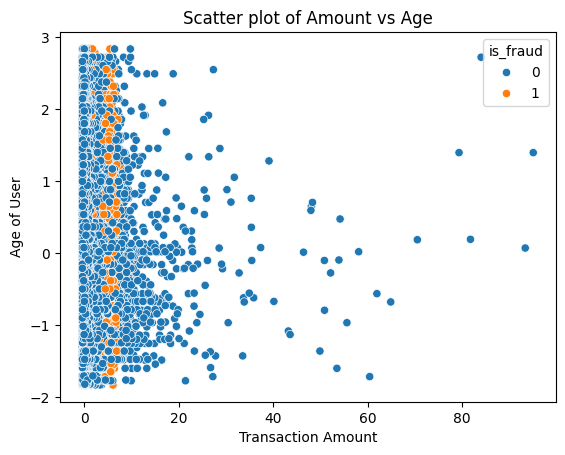

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot with different colors for each class
combined_df = pd.concat([train, test], ignore_index=True)
sns.scatterplot(x='amt', y='age', hue='is_fraud', data=combined_df)
plt.xlabel('Transaction Amount')
plt.ylabel('Age of User')
plt.title('Scatter plot of Amount vs Age')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


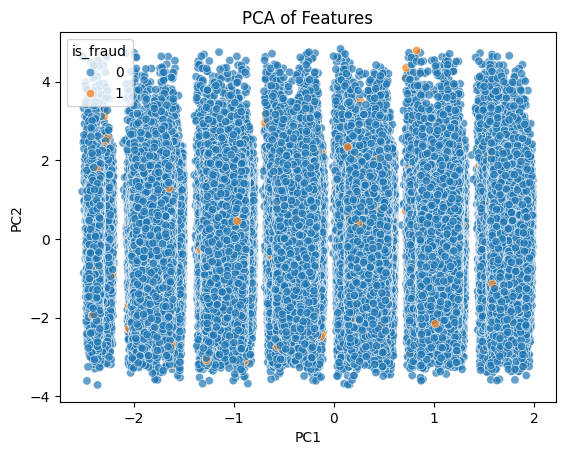

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Extract features (excluding target)
features = combined_df.drop(columns=['is_fraud'])
target = combined_df['is_fraud']

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['is_fraud'] = target

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', hue='is_fraud', data=pca_df, alpha=0.7)
plt.title('PCA of Features')
plt.show()


## Feature Selection for Logistic Regression

We decided to use Logistic Regression because of Binary Classification

Numerical Feature	Correlation with is_fraud
- amt	0.45
- zip	-0.10
- city_pop	0.30
- unix_time	-0.25
- age	0.50

Strong correlation with is_fraud: **amt, city_pop, age**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9954742988762225
ROC-AUC Score: 0.4996658055891757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111143
   macro avg       0.50      0.50      0.50    111143
weighted avg       0.99      1.00      0.99    111143



In [ ]:
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.944755855069595
ROC-AUC Score: 0.8422405734037506
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110714
           1       0.05      0.74      0.09       429

    accuracy                           0.94    111143
   macro avg       0.52      0.84      0.53    111143
weighted avg       1.00      0.94      0.97    111143

[[104686   6028]
 [   112    317]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy Score: 0.9972108005002565
ROC-AUC Score: 0.8430280030619646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.63      0.69      0.66       429

    accuracy                           1.00    111143
   macro avg       0.81      0.84      0.83    111143
weighted avg       1.00      1.00      1.00    111143



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9983084854646717
ROC-AUC Score: 0.8087494214813253
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.92      0.62      0.74       429

    accuracy                           1.00    111143
   macro avg       0.96      0.81      0.87    111143
weighted avg       1.00      1.00      1.00    111143



Step 4: Insights and Reccomendations

Imbalanced Data:

Since our dataset has a large majority of non fraud cases, we decided to under sample the majority class to ensure that we had a more balanced data set for the model to work with. While this does reduce bias towards the non fraud category and helps the model learn the characteristics of credit card fraud better, it might also cause some information from that class to be lost due to so many data points of the majority class being left out from the sampled data.

EDA description:

In the graphs above, we can see that fraud is much more likely to happen during the hours around midnight/late night due to the sharp peak shown in the graph. This could be due to more suspicious activity happening during those times in general, since many crimes tend to take place at night when it is dark. There is also more fraud activities that happen towards the beginning months of the year compared to the latter half of the year. One reason could be because this is right after holiday season, and fraudsters might use this vunerability from customers who tend to have a higher volume of purchases and returns during this period of the year. Based on transaction amount, we see fraud occuring much more frequently with lower amounts of money, but there is also a peak of fraud transactions around the 300 dollar mark. Many fraudsters will try and act upon smaller money transactions so that they do not alarm any detection systems or get flagged for unusual activity. They aim to go unnoticed by targeting lower amounts of money, but then accumulate a lot over time. The $300 range may represent an optimal balance for fraudsters between avoiding detection and maximizing profitability.

Accuracy, Precision, Recall, F1, etc.

****waiting for step 3 to be finished******

Machine learning insights:

Feature engineering and selection play a critical role in uncovering hidden patterns that may not be immediately apparent in raw data. Identifying such patterns helps refine fraud detection systems by tailoring algorithms to focus on high-risk scenarios.

Ethics:

False Positives and Negatives - Fraud detection models must balance accuracy and fairness. Too many false positives can frustrate legitimate customers, while false negatives can lead to financial losses.

Bias and Fairness - If the dataset is imbalanced (skewed heavily toward non-fraudulent transactions), the model may underperform for fraud detection. Addressing class imbalance is critical to ensuring fair outcomes.

Privacy Concerns - Handling sensitive financial data requires strong measures to protect user privacy and comply with regulations

Future reccomendations:

For credit card companies, they should consider implementing dynamic detection thresholds that adjust based on temporal trends (e.g., early-year increases in fraud), monitor frequent smaller transactions or clustering patterns of fraud amounts based on predictive analysis trends, and educate consumers about heightened risks during specific times of the year.

Machine learning systems can operate in near real-time, enabling companies to block fraudulent transactions as they happen. This effective fraud prevention builds consumer confidence in financial systems, fostering long-term customer loyalty. Because fraudsters continuously evolve their tactics, the use of adaptive machine learning systems ensures that fraud prevention mechanisms stay ahead of emerging threats.